# Исследование данных о российском кинопрокате

В нашем распоряжение данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Заказчик исследования — Министерство культуры Российской Федерации.

**Цель исследования** - изучить рынок российского кинопроката и выявить текущие тренды. Обратить внимание на фильмы, которые получили государственную поддержку, чтобы ответить на вопрос, насколько такие фильмы интересны зрителю.

**Ход исследования**

Данные для исследования в файлах mkrf_movies.csv и mkrf_shows.csv. О качестве данных ничего не известно.
Поэтому перед тем, чтобы начать исследование, понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки мы
поищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в несколько этапов:

1. Обзор данных
2. Предобработка данных
3. Исследовастелький анализ данных
4. Исследование фильмов с государственной поддержкой
5. Вывод исследования


### Обзор данных

Составим общее впечатление о данных кинематографа.

In [1]:
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

Прочитаем файл `mkrf_movies.csv` из папки /datasets и сохраним его в переменной `data_movies`. Выведем первые 5 строк таблицы на экран.

In [2]:
# чтение файла с данными и сохранение в data_movies
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
# выведем первые 5 строк data_movies
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Прочитаем файл `mkrf_shows.csv` из папки /datasets и сохраним его в переменной `data_shows`. Выведем первые 5 строк таблицы на экран.

In [3]:
# чтение файла с данными и сохранение в data_shows
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
# используем настройку для избавления экспоненты
pd.options.display.float_format = '{:,.2f}'.format
# выведем первые 5 строк data_shows
data_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Видим, что `data_movies` и `data_movies` имеют одинаковый столбец `puNumber`. Прежде чем объединить их, посмотрим какой тип данных имеет этот столбец в каждой таблице.

In [4]:
# выведем на экран тип данных в столбце 'puNumber' для двух таблиц методом dtypes
print('Тип данных столбца "puNumber" в data_movies:', data_movies['puNumber'].dtypes)
print('Тип данных столбца "puNumber" в data_shows:', data_shows['puNumber'].dtypes)

Тип данных столбца "puNumber" в data_movies: object
Тип данных столбца "puNumber" в data_shows: int64


Как мы видим, тип данных разный. Приобразуем столбец `puNumber` в `data_shows` к типу данных - object.

In [5]:
# изменим тип данных в 'puNumber' для data_shows
data_shows['puNumber'] = data_shows['puNumber'].astype('str')
# выведем на экран тип данных в столбце 'puNumber' методом dtypes
print('Тип данных столбца "puNumber" в data_shows:', data_shows['puNumber'].dtypes)

Тип данных столбца "puNumber" в data_shows: object


Посчитаем количество строк в двух таблицах, чтобы понимать каким методом объединять данные.

In [6]:
# выведем размер таблиц 'data_movies' и 'data_shows'
print('Количество строк и столбцов в data_movies:', data_movies.shape)
print('Количество строк и столбцов в data_shows:', data_shows.shape)

Количество строк и столбцов в data_movies: (7486, 15)
Количество строк и столбцов в data_shows: (3158, 2)


Столбцы имеют одинаковый тип данных. Для объеденения двух таблиц, чтобы все данные из таблицы `data_movies` сохранились применим метод `merge()`, с объединение по столбцу `puNumber`  и режимом объединения "внешний".

In [7]:
# объедиение таблиц методом merge() по столбцу 'puNumber', параметр how - outer
data = data_shows.merge(data_movies, on='puNumber', how='outer')
# выведем первые 5 строк получившийся тааблицы data
data.head()

,puNumber,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113,"2,450.00",Тайна перевала Дятлова,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,5.1,"ужасы,фантастика"
1,111000115,"61,040.00",Небесный верблюд,2015-01-14T12:00:00.000Z,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,"34,000,000.00","49,280,496.00",Министерство культуры,6.7,"детский,семейный"
2,111000116,"153,030,013.40","Статус: ""Свободен""",2016-01-13T12:00:00.000Z,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,"20,000,000.00","20,000,000.00","78,686,500.00",Фонд кино,5.8,"комедия,мелодрама"
3,111000117,"12,260,956.00",После тебя,2017-01-10T12:00:00.000Z,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,"7,000,000.00","20,000,000.00","45,483,233.00","Министерство культуры, Фонд кино",6.7,драма
4,111000118,"163,684,057.79",ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23T12:00:00.000Z,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,nan,nan,nan,NaN,3.2,комедия


Изучим данные таблицы `data` методом `info()`:

In [8]:
#получение общей информации о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
puNumber                 7486 non-null object
box_office               3158 non-null float64
title                    7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


Теперь посчитаем количество строк в двух таблицах :
 - `data_movies` - к которой добавляли
 - `data` - которую получили.

In [9]:
# выведем размер таблиц 'data_movies' и 'data'
print('Количество строк и столбцов в data_movies:', data_movies.shape)
print('Количество строк и столбцов в data:', data.shape)

Количество строк и столбцов в data_movies: (7486, 15)
Количество строк и столбцов в data: (7486, 16)


 И так, можно сделать вывод, что в таблицу вошли все строки из `data_movies`, так как количество строк совпадает с количеством строк в получившийся таблице `data`, количество столбцов увеличилось на 1 (присоединили столбец `box_office` из `data_shows`).
 
 В таблице 16 столбцов, типы данных:  `float64` и `object`.
 
 Согласно документации к данным:
 
* `puNumber` — номер прокатного удостоверения
* `box_office` — сборы в рублях
* `title` — название фильма
* `show_start_date` — дата премьеры фильма
* `type` — тип фильма
* `film_studio` — студия-производитель
* `production_country` — страна-производитель
* `director` — режиссёр
* `producer` — продюсер
* `age_restriction` — возрастная категория
* `refundable_support` — объём возвратных средств государственной поддержки
* `nonrefundable_support` — объём невозвратных средств государственной поддержки
* `financing_source` — источник государственного финансирования
* `budget` — общий бюджет фильма
* `ratings` — рейтинг фильма на КиноПоиске
* `genres` — жанр фильма

В названии столбца `puNumber` приведем название к змеином и нижнему регистру. Остальные названия записаны верно. 

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Вывод**

В каждой строке таблицы представлена информация о фильме, кто, где и когда произвел, а так же рейтинг и бюджет.

Предварительно, мы можем утверждать что данных достаточно для проведения исследования, но встречаются пропущенные значения, судить о происхождении которых с первого взгляда не получится. Для этого нужно привести данные в корректный вид и дальше проводить исследования.

### Предобработка данных

#### Переименование столбцов

Приведем название столбца `puNumber` к нижнему и змеиному регистру.

In [10]:
# переименование столбца методом rename
data = data.rename(columns = {'puNumber': 'pu_number'})

#### Типы данных

Проверем типы данных в датафрейме и преобразуем их там, где это необходимо.

In [11]:
# посмотрим каой тип данных в каждом столбце датафрейма
data.dtypes

pu_number                 object
box_office               float64
title                     object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

Значения в столбце `ratings` имеют тип данных `object` (присутсвую значения тип данных которых str, float). Для перевода типа данных значений во float:

* посмотрим уникальные значения `ratings`
* напишем функцию, которая приведет значения столбца `ratings` к единому формату

In [12]:
# просмотр уникальных значений столбца 'ratings'
data['ratings'].unique()

array(['5.1', '6.7', '5.8', '3.2', '5.3', '3.0', '5.4', '6.1', '5.9',
       '4.7', '6.6', '6.0', '7.2', '7.1', '4.5', '7.3', '3.3', '6.8',
       '5.7', nan, '4.9', '4.3', '2.8', '6.2', '3.9', '1.9', '4.8', '7.0',
       '7.5', '6.4', '99%', '4.2', '6.5', '5.2', '5.0', '3.1', '6.3',
       '5.6', '3.7', '2.6', '8.0', '6.9', '7.8', '4.1', '91%', '2.9',
       '7.4', '3.4', '4.6', '7.9', '8.5', '8.1', '98%', '7.6', '94%',
       '1.4', '3.8', '7.7', '1.5', '2.7', '4.4', '4.0', '2.5', '8.3',
       '8.8', '1.2', '8.4', '5.5', '8.2', '8.7', '1.6', '79%', '9.2',
       '1.0', '89%', '90%', '2.1', '28%', '2.4', '3.5', '83%', '64%',
       '8.6', '3.6', '88%', '19%', '97%', '1.1', '62%', '1.3', '1.8',
       '1.7', '9.0', '8.9', '9.1'], dtype=object)

In [13]:
# напишем функцию fromPersentToRaiting с параметром value, которая будет искать строковое значение
# если это строка и в ней присутствует '%', то удаляем '%' и делим на 10
# если это строка, то меняем на тип float

def fromPersentToRaiting(value):
    if isinstance(value, str):
        if '%' in value:
            value = value.replace('%', '')
            try:
                return float(value) / 10
            except ValueError:
                return 0
        else:
            return float(value)
    return value
# перезапишем значения столбца, которые будут подходить под условие функции fromPersentToRaiting
data['ratings'] = data['ratings'].apply(lambda value: fromPersentToRaiting(value))

In [14]:
# просмотр типа данных столбца 'ratings'
data['ratings'].dtypes

dtype('float64')

Тип данных поменялся на  `float64`. В дальнейшем со столбцом `ratings` можно будет проводить математические операции, если это потребуется.

Стоит заметить, что дата премьеры фильма записана не корректно. Переведем значения столбца `show_start_date` из строки в дату и время

In [15]:
# переведем значения столбца 'show_start_date' из строки в дату и время
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [16]:
# проверим тип данных в столбцах data
data.dtypes

pu_number                        object
box_office                      float64
title                            object
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
dtype: object

**Вывод**

Мы поменяли тип данных в столбцах `ratings`, `age_restriction ` на числовые типы данных - float, int. Значения столбца `show_start_date` привели к типу datetime.

####  Пропущенные значения

Cначала посчитаем, сколько в таблице пропущенных значений. Для этого воспользуемся двумя методами pandas :

In [17]:
# подсчёт пропусков
data.isna().sum()

pu_number                   0
box_office               4328
title                       0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

Заменим пропущенные значения в столбцах с категориальными значениям на строку 'не определен' (`film_studio`, `production_country`, `director`, `producer`, `genres`) методом `fillna()`.

In [18]:
# создадим список столбцов, в которых будем менять пропущенные значения
columns_fillna = ['film_studio', 'production_country', 'director', 'producer', 'genres']
# заменим пропущенные значения на 'не определен'
data[columns_fillna] = data[columns_fillna].fillna('не определен')

Количественные значения в данном случае заменять не будем - не хватает данных для заполнения пропущенных значений.

In [19]:
# подсчёт пропусков
data.isna().sum()

pu_number                   0
box_office               4328
title                       0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
dtype: int64

**Вывод**

На данном этапе мы заменили пропущенные значения в категориальных столбцах на 'не определен', для заполнения количественных данных не хватает данных.

#### Дубликаты

Выполним подсчет явных дубликатов методами`duplicated()` и `sum()`.

In [20]:
# подсчет дубликатов
print('Количество дубликатов в DataFrame:', data.duplicated().sum())

Количество дубликатов в DataFrame: 0


Проверим повторяются ли значения в столбце `pu_number`, так как значения этого столбца нас интересуют без повторений, то есть значения являются уникальными.

In [21]:
# посчитаем уникальные значения для 'pu_number' выведем в порядке убывания
data['pu_number'].value_counts().to_frame()

,pu_number
221054410,2
221154310,2
121023313,1
221078012,1
121003115,1
...,...
224004013,1
121026313,1
224008615,1
124004318,1


Как мы видим, есть совпадения у двух прокатных удостоверений. Это и есть неявные дубликаты. Рассмотрим строчки, где совпадают номера прокатных удостоверений.

In [22]:
# срез данных где значения "221154310"  в 'pu_number'
data.query('"221154310" in pu_number')

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5934,221154310,nan,Как жениться и остаться холостым,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.00,"мелодрама,комедия"
5935,221154310,nan,Иоанна - женщина на папском престоле /По роман...,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.60,"драма,мелодрама,история"


Как мы видим по некоторым данным (название фильма, страна, режиссер и продюссер и тд), это два разных фильма, у которых одинаковый номер прокатного удостоверения. Возможно, такие фильмы были "выпущены" не зависимо друг от друга в одно и тоже время, а программа, присваивающее номер дала сбой.

In [23]:
# срез данных где значения "221054410"  в 'pu_number'
data.query('"221054410" in pu_number')

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
6304,221054410,nan,Анализируй это!,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.40,"комедия,криминал"
6305,221054410,nan,Анализируй то!,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.80,"комедия,криминал"


Если вдаться в подробности, то два таких фильма действительно существуют, но у них разные даты премьеры. Смею предположить, что тут скорее всего произошла ошибка при вводе данных и речь идет об одном и том же фильме.

По аналогии с `pu_number` посмотрим и посчитаем уникальные значения для `title`.

In [24]:
# посчитаем уникальные значения для 'title' выведем в порядке убывания
data['title'].value_counts().to_frame()

,title
День святого Валентина_,5
Гарри Поттер и Дары Смерти - Часть 1/По роману Дж.К.Ролинг/,4
Рапунцель: Запутанная история,4
Знакомство с Факерами 2.,4
Жена путешественника во времени,4
...,...
Время желаний,1
Расплата._,1
Отражение /Фильм содержит сцены жестокости/,1
Выйти замуж за два дня,1


Посмотрим строчки с дубликатами в названиях, чтобы убедиться что это разные фильмы.

In [25]:
# срез данных где значения "День святого Валентина_"  в 'title'
data.query('"День святого Валентина_" in title')

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
5281,221083810,nan,День святого Валентина_,2010-07-15 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия"
5359,221068010,nan,День святого Валентина_,2010-05-14 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия"
5430,121002210,nan,День святого Валентина_,2010-02-03 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия"
5549,221136210,nan,День святого Валентина_,2010-11-30 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия"
6307,221066410,nan,День святого Валентина_,2010-06-01 12:00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,6.70,"мелодрама,комедия"


Можно заметить, что прокатные удостоверения у всех этих 5 фильмов разные, а значит можно считать, что это и есть разные фильмы. Например у римейков могут быть разные прокатные удостоверения и это явно разные фильмы, считать их дубликатами нельзя. Более того, для проката в раазных сетях (кинотеатр, тв и т.п.) выдаются разные прокатные удостоверения.

**Вывод**

Явных дубликатов нет. Дубликаты по прокатным удостоверениям найдены, но удалять я их не спешу. Возможно в обоих случаях, это действительно разные фильмы, и прокатные удостоверения должны быть различными, но программа или человеческий фактор дали сбой в этих случаях.

#### Изучение категориальных значений

Для изучения категориальных значений вспомним, какие это значения. Такие значения встречаются в столбцах `type`, `film_studio`, `production_country`, `director`, `producer`,`financing_source`, `age_restriction`, `genres`.

In [26]:
# выведем на экран первые 5 строк датафрейма
data.head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,111000113,"2,450.00",Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,5.10,"ужасы,фантастика"
1,111000115,"61,040.00",Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,"34,000,000.00","49,280,496.00",Министерство культуры,6.70,"детский,семейный"
2,111000116,"153,030,013.40","Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,"20,000,000.00","20,000,000.00","78,686,500.00",Фонд кино,5.80,"комедия,мелодрама"
3,111000117,"12,260,956.00",После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,"7,000,000.00","20,000,000.00","45,483,233.00","Министерство культуры, Фонд кино",6.70,драма
4,111000118,"163,684,057.79",ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,nan,nan,nan,NaN,3.20,комедия


**Вывод №1**

Во многих этих столбцах, как мы помним были пропуски. Все категориальные пропущенные значения являются случайными, то есть это значит, что вероятность пропуска зависит от других значений в наборе данных, но не от значений собственного столбца - это одна из проблем, которая объединяет такие значения.

##### Исправление  и изучение проблемных значений

Посмотрим на уникальные значения в категориальных столбцах.

`type`

In [27]:
# выведем уникальные значения столбца 'type'
data['type'].unique()

array(['Художественный', ' Художественный', 'Научно-популярный',
       'Анимационный', 'Документальный', ' Анимационный', 'Прочие',
       'Музыкально-развлекательный'], dtype=object)

В столбце `type` всего несколько видов значений, но записаны они по разному: у некоторых присутсвуют пробелы вначале слова. Уберем пробелы и проверим уникальные значения по этому столбцу.

In [28]:
# уберем пробелы и найдем уникальные значения
data['type'].str.strip().unique()

array(['Художественный', 'Научно-популярный', 'Анимационный',
       'Документальный', 'Прочие', 'Музыкально-развлекательный'],
      dtype=object)

`film_studio`

In [29]:
# выведем уникальные значения столбца 'film_studio'
data['film_studio'].unique()

array(['ООО "Нон-Стоп Продакшн"', 'ООО Продюсерский центр "Всё хорошо"',
       'ООО "Кинодом"', ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

`production_country`

In [30]:
# выведем уникальные значения столбца 'production_country'
data['production_country'].unique()

array(['Россия', 'СССР', 'Россия-Казахстан', 'не определен',
       'Россия, Республика Беларусь', 'Россия-Украина',
       'Россия-Украина-Германия',
       'Россия, Германия, Казахстан, Польша, Китай',
       'СССР, Румыния, Франция', 'Россия - Германия',
       'Россия, Франция, Германия, Бельгия', 'Россия, Армения',
       'Россия, Сербия', 'Россия, Украина, Республика Беларусь, Литва',
       'Россия, Казахстан, США', 'Россия-Франция', 'Россия - Польша',
       'СССР, Финляндия', 'Россия - Италия', 'Россия-Германия',
       'СССР - Швейцария - Франция', 'Россия, Италия',
       'Россия, Украина, Польша', 'Россия-Словакия-Чехия',
       'Россия-Белоруссия', 'Россия, Германия', 'Россия-Ирландия',
       'Россия, Германия, Великобритания',
       'СССР, Франция, Англия, Куба, ГДР', 'Армения-Россия',
       'СССР, ЧССР, Западный Берлин, ПНР', 'Россия-Китай',
       'Россия, Украина', 'Россия, Франция, Латвия', 'Россия,  Испания',
       'Россия, Грузия, Испания', 'Россия, Латвия, Чешс

`director`

In [31]:
# выведем уникальные значения столбца 'director'
data['director'].unique()

array(['Ренни Харлин', 'Ю.Фетинг', 'П.Руминов', ..., 'Ник Пауэлл',
       'А.Беляев', 'И.Трусов'], dtype=object)

`producer`

In [32]:
# выведем уникальные значения столбца 'producer'
data['producer'].unique()

array(['А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм', 'И.Плиско',
       'С.Ливнев, Д.Козловский, С.Бобза', ..., 'ВГИК',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

`financing_source`

In [33]:
# выведем уникальные значения столбца 'financing_source'
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

`age_restriction`

In [34]:
# выведем уникальные значения столбца 'age_restriction'
data['age_restriction'].unique()

array(['«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории',
       '«18+» - запрещено для детей', '«12+» - для детей старше 12 лет',
       '«6+» - для детей старше 6 лет'], dtype=object)

`genres`

In [35]:
# выведем уникальные значения столбца 'genres'
data['genres'].unique()

array(['ужасы,фантастика', 'детский,семейный', 'комедия,мелодрама',
       'драма', 'комедия', 'триллер', 'драма,история', 'спорт,драма',
       'боевик,фэнтези,драма', 'военный,боевик,драма', 'история',
       'триллер,драма', 'мюзикл,боевик,драма', 'ужасы,боевик',
       'драма,криминал', 'детектив,фэнтези,триллер', 'не определен',
       'приключения', 'фантастика,мелодрама,комедия', 'драма,военный',
       'драма,мелодрама', 'комедия,семейный', 'детский,фэнтези',
       'история,мелодрама', 'драма,военный,история',
       'фантастика,фэнтези,боевик', 'детский,приключения,фантастика',
       'драма,музыка', 'военный', 'ужасы,фэнтези,боевик',
       'военный,драма,история', 'мелодрама,комедия', 'ужасы,драма',
       'аниме,мультфильм,ужасы', 'триллер,ужасы', 'комедия,фантастика',
       'драма,комедия', 'мелодрама,комедия,семейный', 'детский,комедия',
       'фантастика,боевик,приключения', 'драма,биография,история',
       'приключения,триллер,биография', 'детектив,приключения,драма

**Вывод №2**

Еще одно наблюдение, почти во всех столбцах значения записаны в виде списков. В дальнейшем в нужных нам столбцах (`genres` и `director`) мы выделим первые значения из списков. С остальными столбцами, если потребуется, можно сделать тоже самое.

#### Изучение количественных значений

Для того, чтобы выявить проблему в данных,  построим гистограммы и диаграммы размаха для некоторых столбцов.

##### `box_office`

In [36]:
# получим числовую информацию для 'box_office'
data['box_office'].describe().to_frame()

,box_office
count,"3,158.00"
mean,"76,478,696.16"
std,"240,353,122.82"
min,0.00
25%,"86,239.00"
50%,"2,327,987.55"
75%,"23,979,671.02"
max,"3,073,568,690.79"


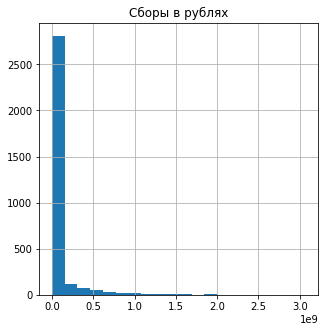

In [37]:
# построим гистограмму, где bins=20,  размер картинки - 5х5
data.hist('box_office', bins=20, figsize=(5,5))
plt.title('Сборы в рублях')
plt.show()

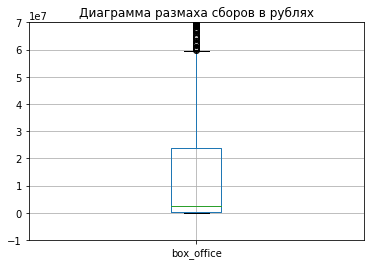

In [38]:
# диаграмма размаха для 'box_office' 
plt.ylim (-10000000, 70000000)
data.boxplot(column='box_office')
plt.title('Диаграмма размаха сборов в рублях')
plt.show()

По гистограмме и диаграмме размаха можно сделать вывод, что есть выбросы. Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 60.000.000р. Все что находится выше рисуются отдельными точками и почти сливаются в одну жирную линию, значит выбросов много. И все же, значения которые отсек верхний ус - редкие. Видно, насколько медиана (зеленая линия) не стремится в длинному хвосту высоких значений. Большая часть сборов находится от 2.000.000р до 3.000.000р.

In [39]:
# выведем число строк-выбросов  box_office > 60000000
print('Количество выбросов для box_office > 60000000:', 
      (len(data.query('box_office> 60000000')) / len(data.query('@pd.isna(box_office) == False')) * 100))

Количество выбросов для box_office > 60000000: 17.384420519316024


Доля значений выбросов составляет ~ 17%.

##### `refundable_support` 

In [40]:
# получим числовую информацию для 'refundable_suppor
data['refundable_support'].describe()

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

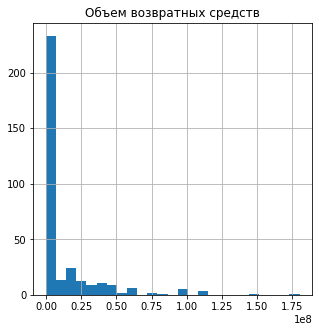

In [41]:
# построим гистограмму, где bins=25,  размер картинки - 5х5
data.hist('refundable_support', bins=25, figsize=(5,5))
plt.title('Объем возвратных средств')
plt.show()

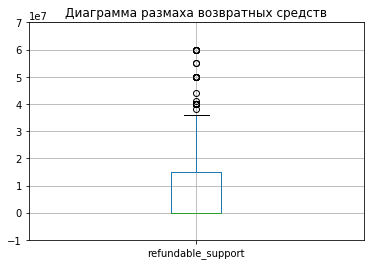

In [42]:
# диаграмма размаха для 'refundable_support' 
plt.ylim (-10000000, 70000000)
data.boxplot(column='refundable_support')
plt.title('Диаграмма размаха возвратных средств')
plt.show()

Мы видим, что в данном столбце тоже существуют выбросы (точки выше верхнего «уса»). Медиана к ним не стремится и равна 0, как и нижный «ус». Видно, что возвратные средства гос.поддержки выше 37.000.000р уже становятся редки. 

In [43]:
# выведем число строк-выбросов  refundable_support > 37000000
print('Количество выбросов для refundable_support > 37000000:', 
      (len(data.query('refundable_support > 37000000')) / len(data.query('@pd.isna(refundable_support) == False')) * 100))

Количество выбросов для refundable_support > 37000000: 12.048192771084338


Доля значений выбросов составляет ~ 12%.

##### `nonrefundable_support`

In [44]:
# получим числовую информацию для 'nonrefundable_support'
data['nonrefundable_support'].describe()

count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

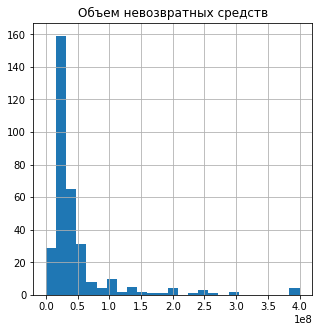

In [45]:
# построим гистограмму, где bins=25,  размер картинки - 5х5
data.hist('nonrefundable_support', bins=25, figsize=(5,5))
plt.title('Объем невозвратных средств')
plt.show()

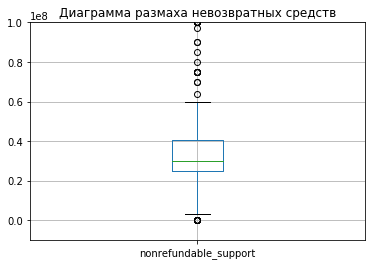

In [46]:
# диаграмма размаха для 'box_office' 
plt.ylim (-10000000, 100000000)
data.boxplot(column='nonrefundable_support')
plt.title('Диаграмма размаха невозвратных средств')
plt.show()

Выбросы есть, и они по обе стороны усов диаграммы размаха. Диапазон нормального размаха от 2.000.000р до 60.000.000р.

In [47]:
# выведем число строк-выбросов  refundable_support > 60000000 или refundable_support < 2000000
print('Количество выбросов для refundable_support:', 
      (len(data.query('nonrefundable_support < 2000000 or nonrefundable_support >60000000')) / 
       len(data.query('@pd.isna(nonrefundable_support) == False')) * 100))

Количество выбросов для refundable_support: 17.16867469879518


Доля значений выбросов составляет ~ 17%.

##### `budget`

Столбец `budget` - это общий бюджет фильма, в который входит то, что дал источник финансирования безвозвратно - `nonrefundable_support`, то что нужно вернуть `refundable_support`, а также то, что создатели фильма вкладывают из своего бюджета. Соответсвенно, из этого следует, то что вложил создатель это разность `budget` - (`nonrefundable_support` +`refundable_support`).

#### Добавление новых столбцов

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [48]:
# присвоим столбцу 'years' год из столбца 'show_start_date'
data['years'] = data['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [49]:
# создадим функцию first_word с параметром value, которая будет возвращать значение из списка с индексом 0
# cписок создадим методом split, где разделителем послужит ','
def first_word(value):
    if len(value) > 0:
        value_list = value.split(',')
        if len(value_list) > 0:
            return value_list[0]
    return value
    
# создадим столбец, значениями которого будет результат функции first_word
data['main_director'] = data['director'].apply(lambda value: first_word(value))
data['main_genres'] = data['genres'].apply(lambda value: first_word(value))

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [50]:
# создадим столбец 'support_share', значениями которого будет доля гос. поддержки от общего бюджета
data['support_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [51]:
# выведем первые 5 строк, чтобы проверить добавление столбца
data.head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,years,main_director,main_genres,support_share
0,111000113,"2,450.00",Тайна перевала Дятлова,2013-01-17 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,5.10,"ужасы,фантастика",2013,Ренни Харлин,ужасы,nan
1,111000115,"61,040.00",Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,"34,000,000.00","49,280,496.00",Министерство культуры,6.70,"детский,семейный",2015,Ю.Фетинг,детский,0.69
2,111000116,"153,030,013.40","Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,"20,000,000.00","20,000,000.00","78,686,500.00",Фонд кино,5.80,"комедия,мелодрама",2016,П.Руминов,комедия,0.51
3,111000117,"12,260,956.00",После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,"7,000,000.00","20,000,000.00","45,483,233.00","Министерство культуры, Фонд кино",6.70,драма,2017,А.Матисон,драма,0.59
4,111000118,"163,684,057.79",ЗОМБОЯЩИК (ZОМБОЯЩИК),2018-01-23 12:00:00,Художественный,"ООО ""Комеди Клаб продакшн""",Россия,"З.Болотаев, К.Смирнов","Е.Казаков, Т.Бадзиев",«18+» - запрещено для детей,nan,nan,nan,NaN,3.20,комедия,2018,З.Болотаев,комедия,nan


### Исследовательский анализ данных

#### Фильмы в прокате

- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов.
- Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Фильмы, которые были в прокате, это те фильмы, которые получили какой-либо сбор, т.е. это те строчки dataframe, где нет пропущенных значений в столбце `box_office`. 
Построим столбчатую диаграмму, которая будет отражать количество фильмов вышло в прокат по годам.

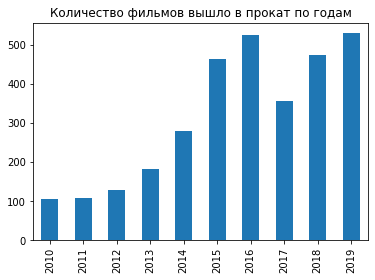

In [52]:
# выберем срез, в котором будут фильмы, вышедшие в прокат, посчитаем сколько их вышло в каждом году,
# построим столбчатую диаграмму
(data
 .query('@pd.isna(box_office) == False')
 ['years'].value_counts().sort_index()
 .plot(kind='bar', title='Количество фильмов вышло в прокат по годам')
)
plt.show()

In [53]:
# узнаем долю фильмов в прокате от всех фильмов
print('Доля фильмов с указанной информацией о прокате:',
      len(data.query('@pd.isna(box_office) == False')) / len(data) * 100)

Доля фильмов с указанной информацией о прокате: 42.185412770504946


**Вывод**

На столбчатой диаграмме видно, что весь период предоставления информации - с 2010г по 2019г. После 2012г количество фильмов, вышедших в прокат растет. В 2017 году происходит скачок - фильмов вышло меньше, чем в 2015г. Больше всего фильмов показывали в кинотеатрах в 2019г. 
Данные по которым строилась диаграмма, это всего 42% от всех данных, что представлено. Получается, что 58% фильмов так и не были показаны в кинотеатрах, скорее всего это сериалы, телепередачи и тд.

#### Сборы по годам

- Изучим, как менялась динамика проката по годам.
- В каком году сумма сборов была минимальной? А в каком максимальной?

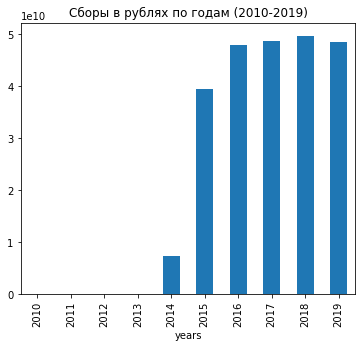

In [54]:
# построим столбчатую диаграмму для среза данных, где фильмы были в прокате
# и посчитаем сумму сборов для каждого года
(data
 .query('@pd.isna(box_office) == False')
 .groupby('years')['box_office'].sum()
 .sort_index()
 .plot(kind='bar', title='Сборы в рублях по годам (2010-2019)', figsize=(6, 5))
)
plt.show()

Для периода 2010г - 2013г, чтобы увидеть динамику этих годов.

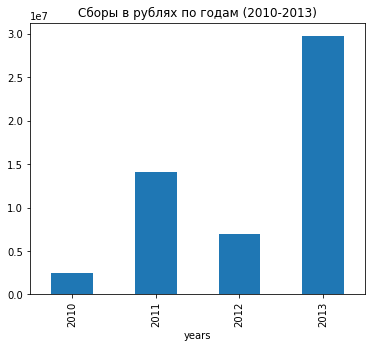

In [55]:
# построим столбчатую диаграмму для среза данных, где фильмы были в прокате
# и посчитаем сумму сборов для периода 2010 - 2013г
(data
 .query('@pd.isna(box_office) == False')
 .groupby('years')['box_office'].sum()
 .sort_index().head(4)
 .plot(kind='bar', title='Сборы в рублях по годам (2010-2013)', figsize=(6, 5))
)
plt.show()

На диаграммах видно, что первые 4 года (2010 - 2013) были не слишком прибыльными, посравнению с остальными. 
Можно заметить, что начиная с 2015г сумма сборов за фильм начинает быстро расти. 
Минимальная сумма зафиксирована в 2010г, тогда она составляла примерно 2.500.000р, а максимальная в 2018г - 50.000.000.000р, это в двадцать тысяч раз больше.

#### Средняя и медианная сумма сборов

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [56]:
# используем сводную таблицу, где индексы - года, значения - сборы в рублях, операции со значения - среднее и медиана
table_summary = data.pivot_table(index='years', values='box_office', aggfunc=['mean', 'median'])
# поменяем двухэтажные названия столбцов на привычные
table_summary.columns = ['mean', 'median']
# выведем полученную таблицу
table_summary

,mean,median
years,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.93","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


По сводной таблице видно, как сильно среднее отличается от медианного значения. Это обусловлено тем, что в каждом году были успешне, а так же не очень фильмы, сборы которых сильно отличаются. Несколько пар фильмов с крайне большими сборами (выбросы) искажают статистику среднего значения.

#### Возрастное ограничение

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
- Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

Построим сводную таблицу, где индексами будут года (с 2015г), значениями - сборы в рублях, операция с которыми будет - подсчет суммы, а столбцы в этой таблице - категории возраста:

In [57]:
# построим сводную таблицу по данным data, где года начиная с 2015
# индексы - года, значения - сборы, колонки - категория возраста, операция со значениями - подсчет суммы
age_table = (
    data
    .query('years >= 2015')
    .pivot_table(index='years', values='box_office', columns='age_restriction', aggfunc='sum')
)

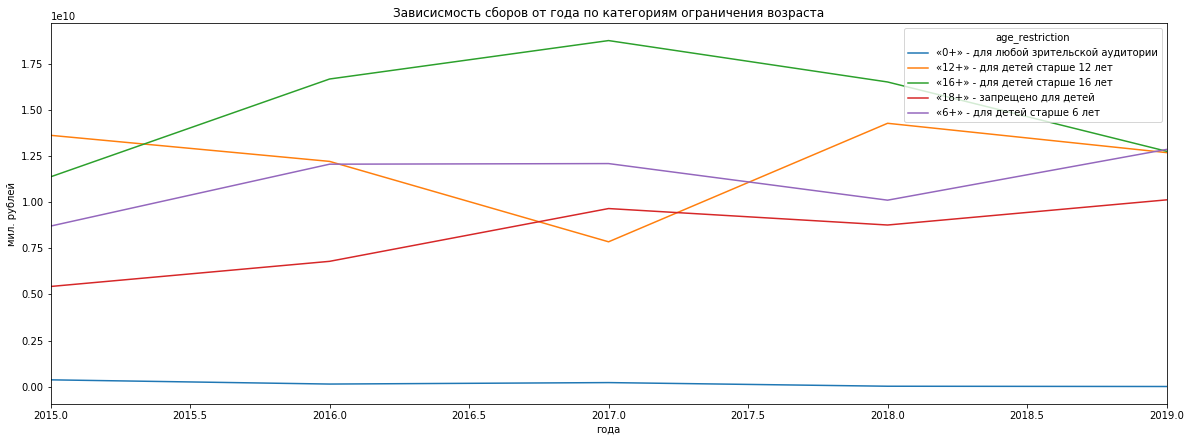

In [58]:
# построим график зависимости сборов от годов по каждой категории
age_table.plot(title='Зависисмость сборов от года по категориям ограничения возраста', figsize=(20, 7))
plt.xlabel('года')
plt.ylabel('мил. рублей')
plt.show()

**Вывод**

Как мы видим, влияние возрастного ограничения на сборы фильмов в прокате существует. Фильмы, у которых ограничение 16+ собирают больше всего сборов, чем остальные. Можно заметить, что каждый год картина меняется - скорее всего это связано с количеством выпускаемых фильмов каждый год для каждой категории. 

### Исследование фильмов, которые получили государственную поддержку

Для работы с фильмами, в финансирование которых вкладывалось государсто, введем переменную `data_films`, которая будет хранить строчки DataFrame с данными финансирования от государства.

In [59]:
# запишем в data_films все строки из data, где нет пропусков в столбце 'financing_source'
data_films = data.query('@pd.isna(financing_source) == False')
#выведем первые 5 строк 
data_films.head()

,pu_number,box_office,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,years,main_director,main_genres,support_share
1,111000115,"61,040.00",Небесный верблюд,2015-01-14 12:00:00,Художественный,"ООО Продюсерский центр ""Всё хорошо""",Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.00,"34,000,000.00","49,280,496.00",Министерство культуры,6.70,"детский,семейный",2015,Ю.Фетинг,детский,0.69
2,111000116,"153,030,013.40","Статус: ""Свободен""",2016-01-13 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,"20,000,000.00","20,000,000.00","78,686,500.00",Фонд кино,5.80,"комедия,мелодрама",2016,П.Руминов,комедия,0.51
3,111000117,"12,260,956.00",После тебя,2017-01-10 12:00:00,Художественный,"Компания Production Value WorldWide (ООО ""ПРОД...",Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,"7,000,000.00","20,000,000.00","45,483,233.00","Министерство культуры, Фонд кино",6.70,драма,2017,А.Матисон,драма,0.59
5,111000119,"4,293,649.51",Пилигрим,2019-02-14 12:00:00,Художественный,"ООО ""Чайка Синема""",Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","115,000,000.00",Министерство культуры,5.30,триллер,2019,А.Баршак,триллер,0.30
7,111000216,"355,567.00",Городские птички.,2016-01-15 12:00:00,Художественный,"ООО ""Каргофильм""",Россия,Ю.Белюсева,А.Готлиб,«16+» - для детей старше 16 лет,0.00,"25,000,000.00","38,461,538.00",Министерство культуры,5.40,"комедия,мелодрама",2016,Ю.Белюсева,комедия,0.65


- Определим в каком году было больше прибыли от сборов.

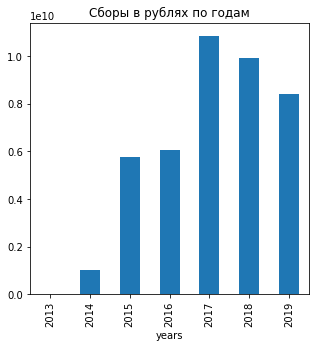

In [60]:
# построим столбчатую диаграмму для среза данных, где фильмы были в прокате
# и посчитаем сумму сборов для каждого года
(data_films
 .query('@pd.isna(box_office) == False')
 .groupby('years')['box_office'].sum()
 .sort_index()
 .plot(kind='bar', title='Сборы в рублях по годам', figsize=(5, 5))
)
plt.show()

На графике, что наиболее успешным годом считается 2017г. В этом году сумма сборов достигла 110.000.000.000 рублей.

- Зная, какой был самый успешный год для финансирования, выведем на экран источников финансирования.

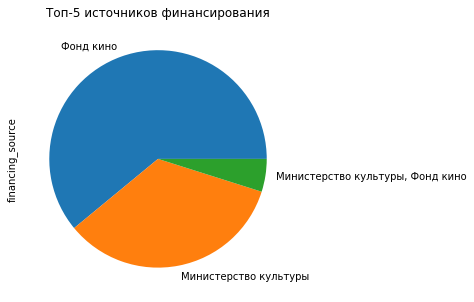

In [61]:
# построим круговую диаграмму для среза данных, где год 2017
# и посчитаем топ источников финансировая
(data_films
 .query('years == 2017')['financing_source']
 .value_counts()
 .plot(kind='pie', title='Топ-5 источников финансирования', figsize=(5, 5))
)

plt.show()

Мы видим, что главным источников финансирования является "Фонд Кино".

- Фильмы каких жанров попадали под программу финансировая? Какой жанр был самый прибыльный?

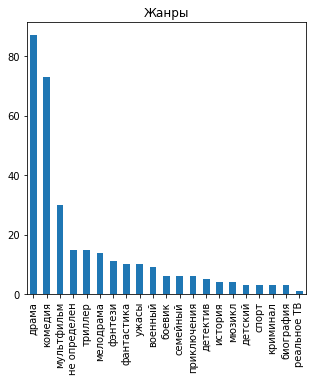

In [62]:
# построим столбчатую диаграмму для жанров
(data_films
 .query('@pd.isna(box_office) == False')['main_genres']
 .value_counts()
 .plot(kind='bar', title='Жанры', figsize=(5, 5))
)
plt.show()

Самыми производимыми были фильмы, жанры которых - драма и комедия. Посмотрим, какой жанр был прибыльнее.

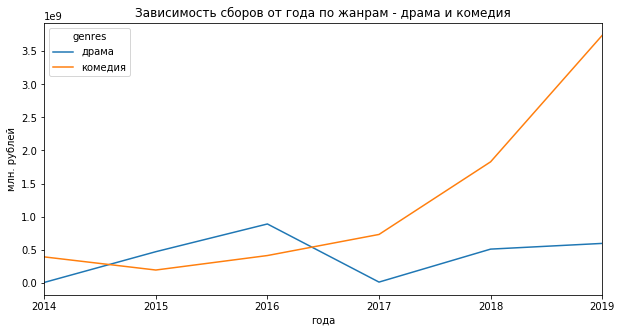

In [63]:
data_films_genres = (
    data_films
    .query('(@pd.isna(box_office) == False) and (genres == "драма" or genres == "комедия")')
    .pivot_table(index='years', values='box_office', columns='genres', aggfunc='sum')
)
data_films_genres.plot(figsize=(10,5))
plt.title('Зависимость сборов от года по жанрам - драма и комедия')
plt.xlabel('года')
plt.ylabel('млн. рублей')
plt.show()

До лета 2016г сборы по двум жанрам были примерно одинаковыми, но в середине 2016г сборы по комедии резко пошли вверх. Из этого можно сделать вывод, что хоть и было поддержано больше драмматических кинокартин, но более прибыльными оставалась комедия, что значит, что на комедию в кино ходят чаще, чем на драмму.

- Посмотрим, какую оценку фильмы получали чаще всего.

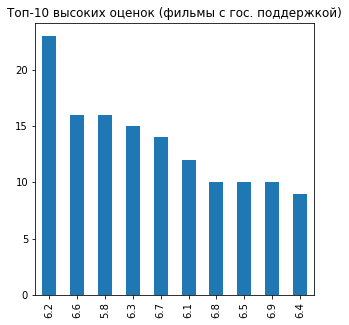

In [64]:
# построим столбчатую диаграмму для оценок
(data_films
 .query('@pd.isna(box_office) == False')['ratings']
 .value_counts().head(10)
 .plot(kind='bar', title='Топ-10 высоких оценок (фильмы с гос. поддержкой)', figsize=(5, 5))
)
plt.show()

In [65]:
ratings_mean = data_films.query('@pd.isna(box_office) == False')['ratings'].median()
print('Средняя оценка по фильмам с гос.поддержкой:', ratings_mean)

Средняя оценка по фильмам с гос.поддержкой: 6.2


Мы видим, что фильмы с гос. поддержкой чаще всего получали оценку 6.2, самая высокая оценка - 6.9. Такую оценку фильмы получили 10 раз.

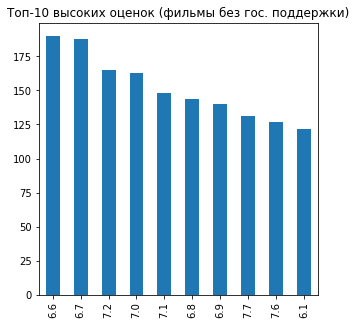

In [66]:
# построим столбчатую диаграмму для оценок
(data
 .query('@pd.isna(box_office) == True')['ratings']
 .value_counts().head(10)
 .plot(kind='bar', title='Топ-10 высоких оценок (фильмы без гос. поддержки)', figsize=(5, 5))
)
plt.show()

In [67]:
ratings_mean = data.query('@pd.isna(box_office) == True')['ratings'].median()
print('Средняя оценка по фильмам без гос. поддержки:', ratings_mean)

Средняя оценка по фильмам без гос. поддержки: 6.8


Можно заметить, что для фильмом без гос. поддержки рэйтинг ыильмов отличается. Средняя оценка возросла до 6.8 (с гос. поддержкой - 6.4). Чаще всего такие фильмы получали оценку 6.6 ( без гос. поодержки - 6.2)

- Посмотрим, как сильно отличался объем возвратных и невозвратных средств по годам.

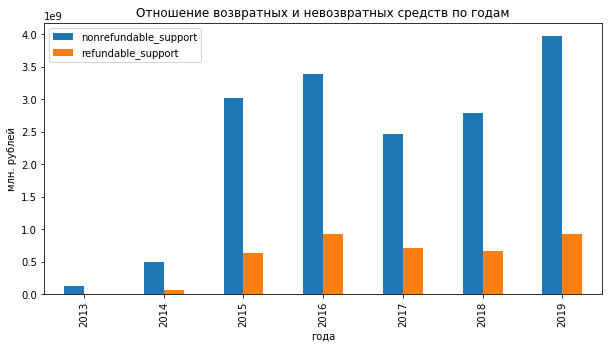

In [68]:
data_support = data_films.pivot_table(index='years', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
data_support.plot(kind='bar', figsize=(10,5))
plt.title('Отношение возвратных и невозвратных средств по годам')
plt.xlabel('года')
plt.ylabel('млн. рублей')
plt.show()

Видим, что объем возратных средств в год в среднем в 3-4 раза меньше, чем невозвратных.

### Общий вывод по исследованию

Мы изучили данные о кинокартинах за период с 2010г по 2019г. 

На этапе предобработки данных выявили некорреткные данные.

1. Мы переимновали столбец `puNumber` в `pu_number` - привели к нижнему и змеиному регистру.
2. Произвели замену категориальных пропусков на "не определен"
3. Изенили тип данных в столбце рейтинг, извлекли некорректные записи и привели их к единому формату.
4. Просмотрели количественные данные, выявили какие значения являются выбросами.
5. Для более успешного исследования добавили новые столбцы: год выхода фильма, главный режиссер и жанр фильмов, посчитали долю гос.финансирования в бюджете фильма

На этапе иследования всех кинокартин выяснили:
- Больше всего фильмов вышло в прокат в 2019г, а доля фильмов вышедших в прокат за весь период исследования составила 42%.
- Начиная с 2015г сумма сборов начинает резко расти, максимальный пик наблюдается в 2018г.
- Возрастное ограничение влияет на сумму сборов. Фильмы, у которых ограничение 16+ собирают больше всего сборов, чем остальные.

На этапе исследования фильмов, которые полчали гос. финансирование, было выявлено:
- Наиболее успешным годом по прибыли был 2017г.
- В 2017г главным источником финансирования стал "Фонд Кино".
- Больше всего фильмов было снято в жанре драммы и комедии, причем из этих двух жанров больше прибыли принес жанр комедия (начиная с июня 2016г).
- Самая высокая оценка у фильмов с гос. финансированием - 6.9, а средняя оценка - 6.2.
- Объем возвратных средств государственной поддержки в 3.5 раза меньше, чем невозвратных.